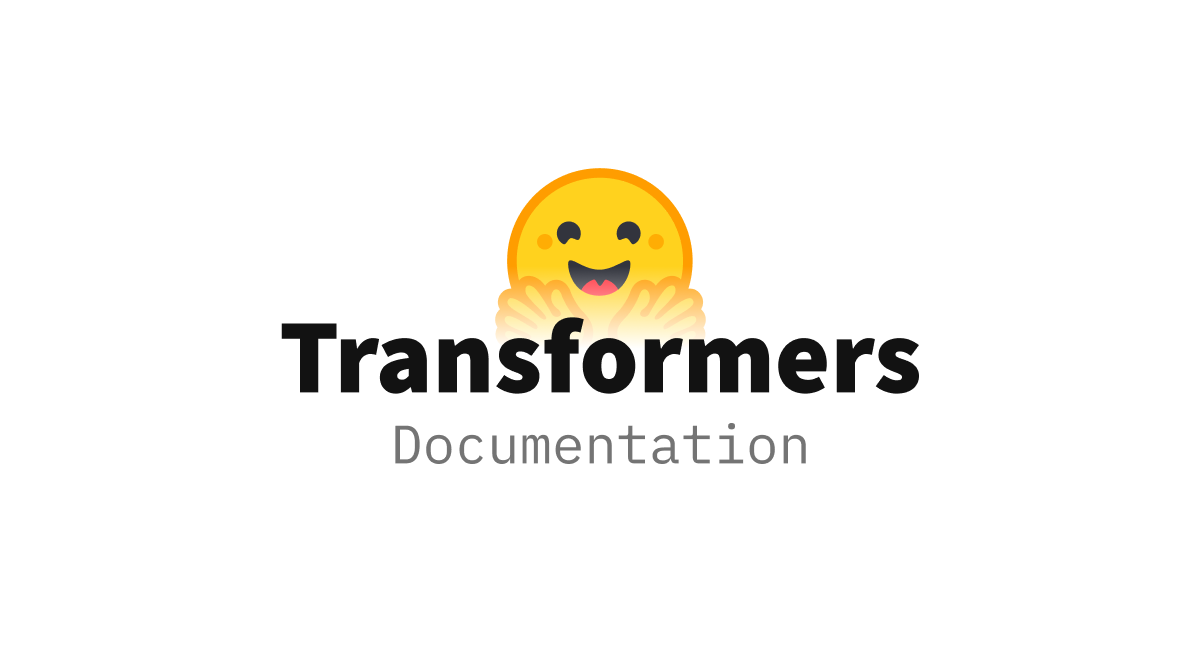

In [1]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 25.6 MB/s 
     |████████████████████████████████| 182 kB 58.0 MB/s 
     |████████████████████████████████| 7.6 MB 54.3 MB/s 


In [19]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Delhi is the [MASK] of India.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.9959532022476196,
  'token': 3007,
  'token_str': 'capital',
  'sequence': 'delhi is the capital of india.'},
 {'score': 0.00046810958883725107,
  'token': 2103,
  'token_str': 'city',
  'sequence': 'delhi is the city of india.'},
 {'score': 0.00038446937105618417,
  'token': 14508,
  'token_str': 'birthplace',
  'sequence': 'delhi is the birthplace of india.'},
 {'score': 0.0003098761080764234,
  'token': 2540,
  'token_str': 'heart',
  'sequence': 'delhi is the heart of india.'},
 {'score': 0.0002865117567125708,
  'token': 4075,
  'token_str': 'headquarters',
  'sequence': 'delhi is the headquarters of india.'}]

In [3]:
unmasker("Beijing is the heart of China. Paris is the [MASK] of France.")

[{'score': 0.6707969307899475,
  'token': 3007,
  'token_str': 'capital',
  'sequence': 'beijing is the heart of china. paris is the capital of france.'},
 {'score': 0.295122355222702,
  'token': 2540,
  'token_str': 'heart',
  'sequence': 'beijing is the heart of china. paris is the heart of france.'},
 {'score': 0.013993091881275177,
  'token': 2415,
  'token_str': 'center',
  'sequence': 'beijing is the heart of china. paris is the center of france.'},
 {'score': 0.008663909509778023,
  'token': 2803,
  'token_str': 'centre',
  'sequence': 'beijing is the heart of china. paris is the centre of france.'},
 {'score': 0.0010524827521294355,
  'token': 2188,
  'token_str': 'home',
  'sequence': 'beijing is the heart of china. paris is the home of france.'}]

In [4]:
unmasker("Beijing is the heart of China. Paris is the [MASK] of France. London is the heart of England.")

[{'score': 0.978805422782898,
  'token': 2540,
  'token_str': 'heart',
  'sequence': 'beijing is the heart of china. paris is the heart of france. london is the heart of england.'},
 {'score': 0.010187541134655476,
  'token': 3007,
  'token_str': 'capital',
  'sequence': 'beijing is the heart of china. paris is the capital of france. london is the heart of england.'},
 {'score': 0.006910018622875214,
  'token': 2415,
  'token_str': 'center',
  'sequence': 'beijing is the heart of china. paris is the center of france. london is the heart of england.'},
 {'score': 0.0018299531657248735,
  'token': 2803,
  'token_str': 'centre',
  'sequence': 'beijing is the heart of china. paris is the centre of france. london is the heart of england.'},
 {'score': 0.000304332934319973,
  'token': 4563,
  'token_str': 'core',
  'sequence': 'beijing is the heart of china. paris is the core of france. london is the heart of england.'}]

# Fill-Mask

Bert-base-uncased is a Fill-Mask model. This model is used to fill the masked part of a sentance. It is a English language pre-trained model using a masked language modeling(MLM) objective.

Masked Language Modeling (MLM):
Take a sentence, the model randomly masks 15% of the words in the input, and then runs the entire masked sentence through the model, and must predict the masked words. This is different from traditional Recurrent Neural Networks (RNNs), which usually see words one after another, or from autoregressive models such as GPT, which obscure future marks internally. It allows the model to learn two-way representations of sentences.

Training data:
The Bert-base-uncased model was pre-trained on BookCorpus, which is a dataset composed of 11,038 unpublished books and English Wikipedia (excluding lists, tables, and titles).

Preprocessing:
15% of the tokens are masked.
In 80% of the cases, the masked tokens are replaced by [MASK].
In 10% of the cases, the masked tokens are replaced by a random token (different) from the one they replace.
In the 10% remaining cases, the masked tokens are left as is.

Pretraining:
The model was trained on 4 cloud TPUs in Pod configuration (16 TPU chips total) for one million steps with a batch size of 256. The sequence length was limited to 128 tokens for 90% of the steps and 512 for the remaining 10%. The optimizer used is Adam with a learning rate of 1e-4, β1=0.9 and β2=0.999, a weight decay of 0.01, learning rate warmup for 10,000 steps and linear decay of the learning rate after.

Performance:
From the results of the three data, it can be concluded that when there is only one sentence, the word capital is the most likely filling (99.69%). This result is consistent with the language used in our daily lives.
When there are two sentences, the other sentence has the same sentence pattern but uses the word heart. We found that although the word capital is still the most likely filling, its probability has decreased (67.08%), and the probability of the word heart has been significantly improved (29.51%).
When there are three sentences, and the other two sentences have the same sentence pattern and use the word heart. The word heart becomes the most likely filling (97.88%), and the word capital possibility becomes very small (1.02%).
In summary, I think this model performs very well. It is not only based on the frequency of daily sentence patterns, but also draws on the influence of context on the use of words.

# Question Answering

In [20]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Why is model conversion important?',
    'context': 'The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks.'
}
res = nlp(QA_input)
print(res)
QA_input = {
    'question': 'Where do I live?',
    'context': 'My name is Miling and I live in London.'
}
res = nlp(QA_input)
print(res)
QA_input = {
    'question': 'What is my name?',
    'context': 'My name is Divyanshu and I live in Boston.'
}
res = nlp(QA_input)
print(res)
QA_input = {
    'question': 'Which name is also used to describe the Amazon rainforest in English?',
    'context': 'The Amazon rainforest (Portuguese: Floresta Amazônica or Amazônia; Spanish: Selva Amazónica, Amazonía or usually Amazonia; French: Forêt amazonienne; Dutch: Amazoneregenwoud), also known in English as Amazonia or the Amazon Jungle, is a moist broadleaf forest that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 square kilometres (2,700,000 sq mi), of which 5,500,000 square kilometres (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. States or departments in four nations contain "Amazonas" in their names. The Amazon represents over half of the planets remaining rainforests, and comprises the largest and most biodiverse tract of tropical rainforest in the world, with an estimated 390 billion individual trees divided into 16,000 species.'
}
res = nlp(QA_input)
print(res)

{'score': 0.21171467006206512, 'start': 59, 'end': 84, 'answer': 'gives freedom to the user'}
{'score': 0.9021801948547363, 'start': 32, 'end': 38, 'answer': 'London'}
{'score': 0.9490349888801575, 'start': 11, 'end': 20, 'answer': 'Divyanshu'}
{'score': 0.7416027784347534, 'start': 201, 'end': 230, 'answer': 'Amazonia or the Amazon Jungle'}


# Question Answering
Roberta-base-squad2 is a question answering model. It is used to generate the answer of the question base on the given context. It is a English language pre-trained model using the roberta-base language model.

Training data: SQuAD 2.0
Eval data: SQuAD 2.0
Hyperparameters:
batch_size = 96
n_epochs = 2
base_LM_model = "roberta-base"
max_seq_len = 386
learning_rate = 3e-5
lr_schedule = LinearWarmup
warmup_proportion = 0.2
doc_stride=128
max_query_length=64

Performance:
From the results of the four data, it can be concluded that the answer to the first question is very broad, and there is no content in the context that exactly matches the text of the question. But the meaning of context can extract an answer that can answer the question. But the score of this answer is not ideal (21.17%). The questions of the second and third questions are very straightforward, and they have the same expressions as the questions in the context, so there are definite answers. The scores of the answers obtained are also very high (90.70% and 93.31%). The fourth question also shows that there will be a precise answer. Although the context given is very verbose, it also yields a highly correct answer(74.16%).
In summary, I think this model performs well. It can correctly give those questions with definite answers. On open questions, we will give appropriate answers as much as possible, and reflect the uncertainty of the answers through the score. The extraction of answers in complex articles is also accurate enough.

# Summarization

In [21]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ The FIFA World Cup™ is the biggest single-sport competition in the world. After a preliminary competition, the 32 qualified men’s national football teams compete to become world champions in a final competition staged during one month in a host country selected by FIFA.
It is anticipated that over one million spectators will attend the tournament’s 64 matches, and the competition will reach a global in-home television audience of over 3 billion people, with more than one billion fans tuning in to watch the final match. In addition to the matches, there are a host of other official competition-related events, including draws, team and referee seminars and workshops, opening and closing ceremonies, award ceremonies, cultural events, press conferences and launch events.
"""
print(summarizer(ARTICLE, max_length=150, min_length=30, do_sample=False))
print(summarizer(ARTICLE, max_length=50, min_length=30, do_sample=False))
print(summarizer(ARTICLE, max_length=50, min_length=10, do_sample=False))
print(summarizer(ARTICLE, max_length=30, min_length=10, do_sample=False))

ARTICLE = """ Hello and welcome to today's Arsenal live blog on football.london.
The World Cup is just one day away as Qatar host Ecuador in Group A to get things kicked off for the 2022 tournament, where a number of sides are eyeing the prestigious trophy. Ten Arsenal stars are away with their nations for the competition, hopeful of getting far into it, but those who aren't away will be training with the club before they're back in action.
Elsewhere, players continue to be linked with a switch to the Emirates Stadium in January, where Mikel Arteta could look to reinforce his squad as they sit top of the Premier League table. The likes of Youri Tielemans, Mykhaylo Mudryk and Jude Bellingham continue to be linked while Bukayo Saka is said to be close to extending his deal.
With that said, keep the blog on lock as we bring you all the latest Arsenal news.
"""
print(summarizer(ARTICLE, max_length=150, min_length=30, do_sample=False))
print(summarizer(ARTICLE, max_length=50, min_length=30, do_sample=False))
print(summarizer(ARTICLE, max_length=50, min_length=10, do_sample=False))
print(summarizer(ARTICLE, max_length=30, min_length=10, do_sample=False))

[{'summary_text': "The FIFA World Cup™ is the biggest single-sport competition in the world. The 32 qualified men’s national football teams compete to become world champions in a final competition staged during one month in a host country selected by FIFA. It is anticipated that over one million spectators will attend the tournament's 64 matches."}]
[{'summary_text': 'The FIFA World Cup™ is the biggest single-sport competition in the world. The 32 qualified men’s national football teams compete to become world champions in a final competition staged during one month in a host country selected by FIFA'}]
[{'summary_text': 'The FIFA World Cup™ is the biggest single-sport competition in the world. The 32 qualified men’s national football teams compete to become world champions in a final competition staged during one month in a host country selected by FIFA'}]
[{'summary_text': 'FIFA World Cup is the biggest single-sport competition in the world. 32 qualified men’s national football teams

# Summarization
Bart-large-cnn is a summarization model. It is used to generate the summarization of a large content. BART is a transformer encoder-encoder (seq2seq) model with a bidirectional (BERT-like) encoder and an autoregressive (GPT-like) decoder. BART is pre-trained by (1) corrupting text with an arbitrary noising function, and (2) learning a model to reconstruct the original text.

BART is particularly effective when fine-tuned for text generation (e.g. summarization, translation) but also works well for comprehension tasks (e.g. text classification, question answering). This particular checkpoint has been fine-tuned on CNN Daily Mail, a large collection of text-summary pairs.

Performance:
I tested the method of controlling variables on the two articles respectively. Test the summarization where the maximum length is limited to 150 and 50 and the minimum length is 30. Simultaneously test the summarization with the longest length limit of 50 and 30 and the shortest length of 10. By comparing the results obtained with the article, summarization has achieved the extraction of important information from the entire article. Through the observation of the results, the model will first follow the principle of summarization first. In other words, it will try to be as close to the shortest length limit as possible (when the shortest limit is 30, no matter what the maximum is, the resulting length will be closer to 30). But when the minimum length limit is too small, in order not to lose the necessary information of the article, the model will not blindly approach the shortest limit, but appropriately increase the length of the result. (When the shortest limit is 10, because there are too few characters, the length of the result will be determined according to the content of the article).
In summary, I think this model performs very well. It not only achieves the summarization of articles given in the limited characters, but also pays attention to the extraction of important information. You will not lose important information blindly for fewer words. This model does a good job of balancing the shortest length limit and the content of the article.

# Text Classification

In [7]:
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
prediction = classifier("I like you. I love you.", )
print(prediction)
prediction = classifier("I do not like you. I hate you.", )
print(prediction)
prediction = classifier("I love you. But I hate you.", )
print(prediction)
prediction = classifier("I hate you. But I love you.", )
print(prediction)

Downloading:   0%|          | 0.00/768 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

[[{'label': 'sadness', 'score': 0.001765756867825985}, {'label': 'joy', 'score': 0.033889733254909515}, {'label': 'love', 'score': 0.9624291062355042}, {'label': 'anger', 'score': 0.001095952233299613}, {'label': 'fear', 'score': 0.0003971164987888187}, {'label': 'surprise', 'score': 0.00042245909571647644}]]
[[{'label': 'sadness', 'score': 0.03216877952218056}, {'label': 'joy', 'score': 0.0019054798176512122}, {'label': 'love', 'score': 0.004386784974485636}, {'label': 'anger', 'score': 0.9600632190704346}, {'label': 'fear', 'score': 0.0011310889385640621}, {'label': 'surprise', 'score': 0.0003445757902227342}]]
[[{'label': 'sadness', 'score': 0.07416528463363647}, {'label': 'joy', 'score': 0.006289529148489237}, {'label': 'love', 'score': 0.07611501216888428}, {'label': 'anger', 'score': 0.8396787047386169}, {'label': 'fear', 'score': 0.0027262596413493156}, {'label': 'surprise', 'score': 0.0010252038482576609}]]
[[{'label': 'sadness', 'score': 0.018142471089959145}, {'label': 'joy',

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/text_classification.py:92: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  UserWarning,


# Text Classification
Distilbert-base-uncased-emotion is a text classification model. It is used to classify the text emotion. Distilbert was created through knowledge distillation in the pre-training phase, and it reduced the size of the BERT model by 40% while retaining 97% of the language understanding ability. It is smaller and faster than Bert and any other Bert-based models.

Distilbert-base-uncased finetuned on the emotion dataset using HuggingFace Trainer with below Hyperparameters:
learning rate 2e-5
batch size 64
num_train_epochs=8

Performance:
In order to test the performance of the model, I tested four kinds of data. The first type of text only contains positive expressions (like, love). Therefore, the proportion of love in the test result is extremely high (96.24%). The second type of text only contains negative negative expressions (do not like, hate), so the test result anger accounts for a very high proportion (96.01%). The third type of text is a negative transition. Although positive expressions (love) are included, negative emotions (hate) are emphasized after the transition. Therefore, the test result is that the proportion of anger is high (83.97%). The fourth type of text is a positive transition. Although it contains negative expressions (hate), positive emotions (love) are emphasized after the transition. Therefore, the test result is that love accounts for a high proportion (95.18%).
In summary, I think this model performs very well. It not only achieves the classification of a single emotional text, but also a correct judgment on the text with emotional transitions. This basically meets the judgment requirements for most text.

# Text Generation

In [8]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties that"}]

In [9]:
generator("Once upon a time,", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Once upon a time, one of the two big players in our league who were under heavy scrutiny at that point in time was Tom Brady. In the'},
 {'generated_text': 'Once upon a time, a great many of her people, like her daughters, lost so little, that nothing was spoken of them in the days of'},
 {'generated_text': 'Once upon a time, these characters all worked for a different corporation who was just like them. But now, they can still keep their jobs. And'},
 {'generated_text': 'Once upon a time, it is possible to see through the veil of confusion. From time to time, the veil of confusion has become visible, if'},
 {'generated_text': 'Once upon a time, the world was becoming a place where everything and everything happened according to rules the gods had set in place."\n\nAs of'}]

# Text Generation
GPT-2 is a text generation model. It is used to generate text from several words. It is a Transformers model that is pre-trained on a very large English data corpus in a self-supervised manner. This means that it only pre-trains the original text, no one labels them in any way (which is why it can use a lot of publicly available data), and generates inputs and labels from these texts through an automated process. More precisely, it is trained to guess the next word in a sentence.

To be more precise, the input is a continuous text sequence of a certain length, the target is the same sequence, and the mark (word or word fragment) is moved to the right. The model uses a masking mechanism internally to ensure that the prediction of label i only uses inputs from 1 to i, and does not use future labels.

In this way, the model learns the internal representation of the English language, which can then be used to extract features useful for downstream tasks. However, this model is most suitable for pre-trained content, which is to generate text based on prompts.

Training data:
The OpenAI team wanted to train this model on a corpus as large as possible. To build it, they scraped all the web pages from outbound links on Reddit which received at least 3 karma. Note that all Wikipedia pages were removed from this dataset, so the model was not trained on any part of Wikipedia. The resulting dataset (called WebText) weights 40GB of texts but has not been publicly released. You can find a list of the top 1,000 domains present in WebText here.

Performance:
I tested two texts in total, and each test performed text generation five times. It can be found from the results that the results of each text generation are very different. In other words, text generation has very good uniqueness. No duplicate text will be generated. But it can also be found that because text generation is generated word by word, text will suddenly stop at max length. This prevents us from getting a complete text.
In summary, I think the performance of this model is not good enough. Although it has achieved the uniqueness and diversity of text generation. But it cannot generate a complete text within the limited number of words. This cannot perfectly match our needs.

# Text2Text Generation

In [10]:
from transformers import pipeline

nlp = pipeline("text2text-generation", model='Salesforce/mixqg-large', tokenizer='Salesforce/mixqg-large')
    
CONTEXT = "In the late 17th century, Robert Boyle proved that air is necessary for combustion."
ANSWER = "Robert Boyle"

def format_inputs(context: str, answer: str):
    return f"{answer} \\n {context}"
    
text = format_inputs(CONTEXT, ANSWER)

nlp(text)

Downloading:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

[{'generated_text': 'Who proved that air is necessary for combustion?'}]

In [11]:
CONTEXT = "In the late 17th century, Robert Boyle proved that air is necessary for combustion."
ANSWER = "Combustion"
    
text = format_inputs(CONTEXT, ANSWER)
nlp(text)

[{'generated_text': 'What does air do?'}]

In [12]:
CONTEXT = "In the late 17th century, Robert Boyle proved that air is necessary for combustion."
ANSWER = "In the late 17th century"
    
text = format_inputs(CONTEXT, ANSWER)
nlp(text)

[{'generated_text': 'When did Robert Boyle prove that air is necessary for combustion?'}]

# Text2Text Generation
Mixqg-large is a text to text generation model. It is used to generate new text from a exist context(Generate question from an answer and a context).

Asking good questions is an essential ability for both human and machine intelligence. Existing neural question generation approaches mainly focus on the short factoid type of answers. In this model, it propose a neural question generator, MixQG, to bridge this gap. It combines 9 question answering datasets with diverse answer types, including yes/no, multiple-choice, extractive, and abstractive answers, to train a single generative model. It shows with empirical results that this model outperforms existing work in both seen and unseen domains and can generate questions with different cognitive levels when conditioned on different answer types.

Performance:
I tested it by extracting different parts of the same context as answers. It can be seen from the results. When the answer is an important part of the context, the generated question is perfect. But when the answer is only one word (the part that is not important enough). Although the generated problem is not logically problematic, it does not have enough contact with the main body of the context. In other words, the generated problem is not the best.
In summary, I think this model performs well, but it can be even better. Although it generates the best problems in most cases. But it can be improved to the point that when only one word is extracted as an answer, it can still give the most perfect question in a comprehensive context.


# Token Classification

In [13]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin."

ner_results = nlp(example)
print(ner_results)
example = "My name is Sarah and I work in Apple."

ner_results = nlp(example)
print(ner_results)
example = "My name is Clara and I live in Berkeley, California."

ner_results = nlp(example)
print(ner_results)

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433M [00:00<?, ?B/s]

[{'entity': 'B-PER', 'score': 0.99913067, 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': 0.99953353, 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]
[{'entity': 'B-PER', 'score': 0.9987974, 'index': 4, 'word': 'Sarah', 'start': 11, 'end': 16}, {'entity': 'B-ORG', 'score': 0.99914837, 'index': 9, 'word': 'Apple', 'start': 31, 'end': 36}]
[{'entity': 'B-PER', 'score': 0.99641764, 'index': 4, 'word': 'Clara', 'start': 11, 'end': 16}, {'entity': 'B-LOC', 'score': 0.996198, 'index': 9, 'word': 'Berkeley', 'start': 31, 'end': 39}, {'entity': 'B-LOC', 'score': 0.9990196, 'index': 11, 'word': 'California', 'start': 41, 'end': 51}]


# Token Classification
Bert-base-NER is a token classification model. It is used to recognize different type words from a text. Bert-base-NER is a fine-tuned BERT model that is ready to use for Named Entity Recognition and achieves state-of-the-art performance for the NER task. It has been trained to recognize four types of entities: location (LOC), organizations (ORG), person (PER) and Miscellaneous (MISC). This model is a bert-base-cased model that was fine-tuned on the English version of the standard CoNLL-2003 Named Entity Recognition dataset.

Abbreviation and Description
O: Outside of a named entity
B-MIS: Beginning of a miscellaneous entity right after another miscellaneous entity
I-MIS: Miscellaneous entity
B-PER: Beginning of a person’s name right after another person’s name
I-PER: Person’s name
B-ORG: Beginning of an organization right after another organization
I-ORG: organization
B-LOC: Beginning of a location right after another location
I-LOC: Location

Performance: I tested three different similar sentences. It turns out that the model easily distinguishes names, organizations, and locations, and the accuracy is high (above 99%). This is related to the use of a huge dataset.
I think this model performs very well. When the preprocessing draws on a huge dataset, it will make the model's analysis of new sentences and text more reliable and accurate.

# Translation

In [14]:
from transformers import T5TokenizerFast, T5ForConditionalGeneration

tokenizer = T5TokenizerFast.from_pretrained('t5-small')

model = T5ForConditionalGeneration.from_pretrained('t5-small', return_dict=True)

input = "My name is Azeem and I live in India"

# You can also use "translate English to French" and "translate English to Romanian"
input_ids = tokenizer("translate English to German: "+input, return_tensors="pt").input_ids  # Batch size 1

outputs = model.generate(input_ids)

decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(decoded)

input = "My name is Sarah and I live in London"

input_ids = tokenizer("translate English to German: "+input, return_tensors="pt").input_ids  # Batch size 1

outputs = model.generate(input_ids)

decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(decoded)

input_ids = tokenizer("translate English to French: "+input, return_tensors="pt").input_ids  # Batch size 1

outputs = model.generate(input_ids)

decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(decoded)

input = "My name is Sarah and I live in London"

input_ids = tokenizer("translate English to French: "+input, return_tensors="pt").input_ids  # Batch size 1

outputs = model.generate(input_ids)

decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(decoded)

input_ids = tokenizer("translate English to Romanian: "+input, return_tensors="pt").input_ids  # Batch size 1

outputs = model.generate(input_ids)

decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(decoded)

input = "My name is Sarah and I live in London"

input_ids = tokenizer("translate English to Romanian: "+input, return_tensors="pt").input_ids  # Batch size 1

outputs = model.generate(input_ids)

decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(decoded)

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


Downloading:   0%|          | 0.00/242M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


Mein Name ist Azeem und ich lebe in Indien.
Mein Name ist Sarah und ich lebe in London.
Mon nom est Sarah et je résidais à Londres.
Mon nom est Sarah et je résidais à Londres.
Numele meu este Sarah şi eu locuiesc la Londra
Numele meu este Sarah şi eu locuiesc la Londra


# Translation
T-5-small is a translation model. It is used to translate text to target language. Transfer learning, where the model is first pre-trained on data-rich tasks, and then fine-tuned on downstream tasks, has become a powerful technology in natural language processing (NLP). The effectiveness of transfer learning has spawned a variety of methods, methodologies and practices. In this article, the model explores the prospects of NLP transfer learning technology by introducing a unified framework for converting each language question into a text-to-text format. The model system studies and compares the pre-training goals, architectures, unlabeled data sets, migration methods, and other factors of dozens of language understanding tasks.

Performance:
I tested the translation of two English sentences into German, French, and Romanian. Compare the results with google translate and local language habits. We found that the accuracy of translation is very high. Different from word-by-word translation, this model achieves semantic translation. So I think this model performs very well. Of course, this has a certain relationship with the language habits and language formation foundations of these languages. If you are translating to a language such as Chinese, which has a huge difference in language foundation, whether the effect of the model can be maintained so excellent remains to be tested.

# Zero-Shot Classification

In [15]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
sequence_to_classify = "one day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']
classifier(sequence_to_classify, candidate_labels)

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.9938651919364929, 0.0032737930305302143, 0.0028610294684767723]}

In [16]:
sequence_to_classify = "I have a problem with my iphone that needs to be resolved asap!!"
candidate_labels = ['urgent', 'not urgent', 'phone', 'tablet', 'computer']
classifier(sequence_to_classify, candidate_labels)

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.503635585308075,
  0.4787997603416443,
  0.012600064277648926,
  0.002655790187418461,
  0.0023087533190846443]}

# Zero-Shot Classification
Bart-large-mnli is a zero-shot classification model. It is used to classify the context to some of the given labels.

This model proposes a method to use a pre-trained NLI model as a ready-made zero-sample sequence classifier. The working principle of this method is to use the sequence to be classified as the NLI premise and construct a hypothesis from each candidate label. For example, if we want to evaluate whether a sequence belongs to the "political" category, we can construct a hypothesis This text is about police... and then convert the probability of implication and contradiction into label probability.

Performance:
In order to test the performance of the model, I conducted four tests. The first test result shows that this model can easily select the label that best matches it by the meaning of the sentence (travel: 99.39%). The second test result shows that when the meaning of the sentence contains more than one label, this model can reasonably balance the weight of the labels (urgent: 50.36%, phone: 47.88%). The third test result shows that when there are similar labels (mobile, website), this model can also obtain a more suitable label (moble: 96.01%) through the analysis of the context, and reduce the probability of irrelevant labels (website : 0.87%). The fourth test proved that this model can successfully analyze the correlation of different labels when dealing with complex and lengthy contexts. So as to give accurate answers.
In summary, I think the performance of this model is perfect. Whether it is a simple sentence or a large paragraph, the weight of different labels can be successfully and reasonably assigned.

In [17]:
! pip install -U sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 1.3 MB 38.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=29caf6da06d118f0f31083e184326f5e4dfe73988a6b9f58b7440037d05decd8
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


# Sentence Similarity

In [18]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
          ]

#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Top-5 most similar pairs:
A man is eating food. 	 A man is eating a piece of bread. 	 0.7553
A man is riding a horse. 	 A man is riding a white horse on an enclosed ground. 	 0.7369
A monkey is playing drums. 	 Someone in a gorilla costume is playing a set of drums. 	 0.6433
A woman is playing violin. 	 Someone in a gorilla costume is playing a set of drums. 	 0.2564
A man is eating food. 	 A man is riding a horse. 	 0.2474


# Sentence Similarity
All-MiniLM-L6-v2 is a sentence similarity model. It is used to judge the similarity of sentences. This is a sentence-transformers model: It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.

This model aims to train sentence embedding models on very large sentence-level data sets using self-supervised contrast learning objectives. This model uses the pre-trained nreimers/MiniLM-L6-H384-uncased model and fine-tunes the data set in the 1B sentence. This model uses contrast learning objectives: given a sentence in a pair of sentences, the model should predict which of the other sentences in a set of randomly sampled ones actually pair with it in the data set.

Hyper parameters:
Authors trained this model on a TPU v3-8. They train the model during 100k steps using a batch size of 1024 (128 per TPU core). They use a learning rate warm up of 500. The sequence length was limited to 128 tokens. They used the AdamW optimizer with a 2e-5 learning rate.

Training data:
Authors use the concatenation from multiple datasets to fine-tune this model. The total number of sentence pairs is above 1 billion sentences. Authors sampled each dataset given a weighted probability.

Performance:
To test the performance of the model, I entered 9 sentences and compared the similarity between all sentences in a loop. The 5 combinations with the highest similarity and similarity are output. We can find through artificial analysis of the meaning of sentences that this model successfully analyzes the similarity between these 9 different sentences.
I think the performance of this model is very good. It can not only analyze the similarity of sentences from the surface (whether the literal is the same), but also increase the similarity value of sentences with the same sentence pattern (or similar in meaning). So as to get a comprehensive and reasonable similarity between sentences.

MIT License

Copyright (c) 2022 Divyanshu Bhardwaj

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
